In [1]:
import numpy as np
from quick.decoder.bp_decoder import bp_decoder
from quick.dataset.surface import PlanarCode, ToricCode
from quick.error import phaseflip_error
import matplotlib.pyplot as plt

### Belief propagation
Belief propagation algorithm is a decoder for classical LDPC code. The original version can be used to decode quantum CSS code with only either bit-flip error or phase-flip error. Follow by the decoding procedure in 'pymatching_decoder_demo', we can see different performance between MWPM decoder and BP decoder. Unlike MWPM, BP can be used to decode hypergraph code. However, the implementation of BP here runs much slower than pymatching since we operate it by Python instead of C++. 

In [2]:
%%time

prob = np.linspace(0.01,0.2,9)
lattice = [5,9,13]
logic_error_rate_all = []
num_shots = 5000

for l in lattice:
    planarcode = PlanarCode(l)
    H = planarcode.Hx
    lx = planarcode.logical_op[0]
    n = planarcode.num_physical

    for error_probability in prob:

        logic_num_error = 0
        for i in range(num_shots):
            E = phaseflip_error(physical_qubits = n, phaseflip_prob = error_probability)
            noise = E[1]
            
            syndrome = H@noise % 2
            prediction = bp_decoder(H, syndrome, error_probability, 10)
            after_receovery = (prediction + noise) % 2
            
            if (lx @  after_recovery) % 2 != 0:
                logic_num_error = logic_num_error + 1

        logic_error_rate_all.append(logic_num_error/num_shots)

CPU times: total: 1min 16s
Wall time: 22min 24s


Logical error rates for various error probabilities and different lattice sizes
[[0.0064 0.0534 0.1226 0.2036 0.2676 0.3542 0.3878 0.4426 0.4476]
 [0.0844 0.2396 0.3344 0.391  0.4304 0.4682 0.4826 0.4878 0.4998]
 [0.014  0.1232 0.276  0.3786 0.4362 0.4772 0.4954 0.505  0.4992]]


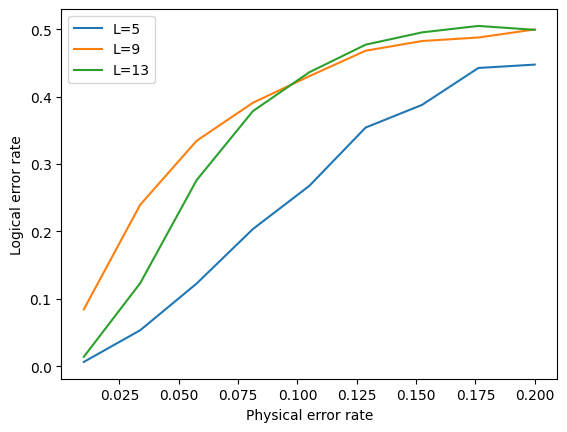

In [3]:
logic_error_rate_all = np.array(logic_error_rate_all).reshape([3,9])
print('Logical error rates for various error probabilities and different lattice sizes')
print(logic_error_rate_all)

plt.figure()
for i in range(3):
    plt.plot(prob,logic_error_rate_all[i],label = "L={}".format(lattice[i]))
plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")
plt.legend()
plt.show()

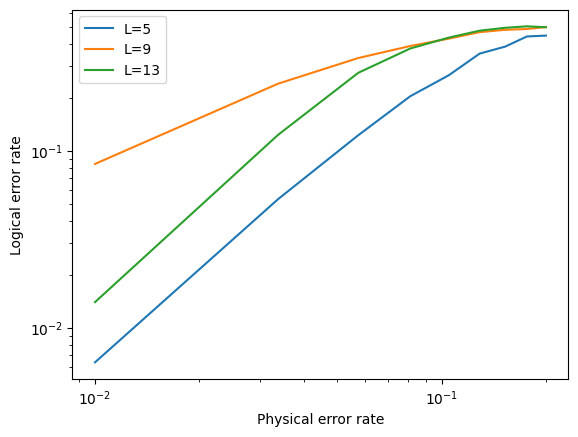

In [4]:
plt.figure()
for i in range(3):
    plt.loglog(prob,logic_error_rate_all[i],label = "L={}".format(lattice[i]))
plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")
plt.legend()
plt.show()